# Web Scraping Project : What makes the airflight service the best?
(World Top10)

In [628]:
finding_word = 'attentive'
finding_word2 = ''
finding_word3 = ''

In [520]:
import pandas as pd
load_data1 = pd.read_csv('operate_singapore-airlines.csv')
load_data2 = pd.read_csv('operate_qatar-airways.csv')
load_data3 = pd.read_csv('operate_ana-all-nippon-airways.csv')
load_data4 = pd.read_csv('operate_emirates.csv')
load_data5 = pd.read_csv('operate_eva-air.csv')
load_data6 = pd.read_csv('operate_cathay-pacific-airways.csv')
load_data7 = pd.read_csv('operate_lufthansa.csv')
load_data8 = pd.read_csv('operate_hainan-airlines.csv')
load_data9 = pd.read_csv('operate_garuda-indonesia.csv')
load_data10 = pd.read_csv('operate_thai-airways.csv')

load_data = pd.concat([load_data1,load_data2,load_data3,load_data4,load_data5,load_data6,load_data7,load_data8,load_data9,load_data10], axis=0)
load_data

,Aircraft,CabinFlown,CabinStaffService,DateFlown,FoodAndBeverages,GroundService,InflightEntertainment,Recommended,Route,SeatComfort,Textchunk,TypeOfTraveller,ValueForMoney,WifiAndConnectivity
0,NaN,Economy Class,4.0,July 2018,1.0,3.0,4.0,no,San Francisco to Bangalore via Singapore,2.0,| San Francisco to Bangalore via Singapore. ...,Family Leisure,2.0,NaN
1,Boeing 787-10,Economy Class,5.0,June 2018,4.0,5.0,4.0,yes,Manila to Bangkok via Singapore,5.0,| Manila to Bangkok via Singapore. My first ...,Business,5.0,NaN
2,Boeing 777,Business Class,5.0,April 2018,5.0,5.0,5.0,yes,Singapore to Beijing,5.0,| Singapore to Beijing. Took this flight in ...,Solo Leisure,5.0,NaN
3,Boeing 777-200,Economy Class,5.0,May 2018,5.0,5.0,4.0,yes,Christchurch to Singapore Return,4.0,| My wife and I flew this route on May 1st t...,Couple Leisure,5.0,NaN
4,NaN,Business Class,1.0,July 2018,2.0,5.0,3.0,no,Denpasar to Los Angeles via Singapore and Seoul,2.0,| My recent experience in business class was...,Solo Leisure,2.0,NaN
5,NaN,Business Class,5.0,July 2018,4.0,5.0,5.0,yes,"Wellington to Bangalore via Melbourne, Singapore",5.0,| I am very happy with the service and care ...,Family Leisure,5.0,NaN
6,Boeing 777-300ER,Economy Class,5.0,July 2018,4.0,5.0,5.0,yes,Sydney to Singapore,5.0,"| Sydney to Singapore on SQ242, began with v...",Business,4.0,NaN
7,A330,Economy Class,3.0,June 2018,2.0,3.0,1.0,no,Singapore to Bali,2.0,| Singapore to Bali. Singapore Airlines was d...,Family Leisure,3.0,NaN
8,A380 / A330,Economy Class,3.0,June 2018,5.0,3.0,5.0,yes,Singapore to Hong Kong,5.0,| SQ856 From Singapore to Hong Kong on the A3...,Family Leisure,5.0,NaN
9,NaN,Business Class,4.0,May 2018,4.0,4.0,4.0,yes,Singapore to London,5.0,| Very impressed with the overall journey wi...,Couple Leisure,3.0,4.0


In [579]:
import re
text_chunk = ' '.join(list(load_data.loc[load_data['CabinStaffService'] < 3.0, 'Textchunk']))
text_without_punctuation = re.sub('[:\',\-!;"()?”“’|=%\[\]/£+$><]',"", text_chunk)
text_lower = text_without_punctuation.lower()
text_lower

'   my recent experience in business class was very subpar. first off the seats were angled weird and made it difficult to sleep comfortably. the entertainment remote was also not very responsive. there were way too many announcements causing frequent interruptions in watching movies and dont tell me they are necessary as ive never experienced so many announcements on any other airlines. i booked the cook for all my flight meals when it was available. on none of the flights were any of the flight attendants aware that i had preordered my meals. they always asked me what i wanted to order and i had to remind them that i had booked the cook.  on my last leg back home seoul to lax same problem occurred but this time they forgot to serve me breakfast despite being awoken almost 4 hours before landing. they served me the preliminary stuff but then i sat for another hour with no meal served. i went up to one of the flight attendants and she notified me that she accidentally gave my preordere

In [580]:
import nltk
text_tokens = nltk.word_tokenize(text_lower)
text_tagged = nltk.pos_tag(text_tokens, tagset='universal')
text_tagged

lemma = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

object_words = []

for i in text_tagged:
    if i[1] == 'ADJ':
        lemma_word = lemma.lemmatize(i[0], 'a')
        stemm_word = stemmer.stem(lemma_word)
        object_words.append((i[0], lemma_word, stemm_word, 'a'))
    elif i[1] == 'ADV':
        lemma_word = lemma.lemmatize(i[0], 'r')
        stemm_word = stemmer.stem(lemma_word)
        object_words.append((i[0], lemma_word, stemm_word, 'r'))
    elif i[1] == 'NOUN':
        lemma_word = lemma.lemmatize(i[0], 'n')
        stemm_word = stemmer.stem(lemma_word)
        object_words.append((i[0], lemma_word, stemm_word, 'n'))
    elif i[1] == 'VERB':
        lemma_word = lemma.lemmatize(i[0], 'v')
        stemm_word = stemmer.stem(lemma_word)
        object_words.append((i[0], lemma_word, stemm_word, 'v'))
    elif i[1] == '.':
        object_words.append((i[0], i[0], i[0], '.'))
    else:
        pass

object_words  #comprehensive analysis object words list : original, lemmatized, stemmed, word class, including periods.

[('recent', 'recent', 'recent', 'a'),
 ('experience', 'experience', 'experi', 'n'),
 ('business', 'business', 'busi', 'n'),
 ('class', 'class', 'class', 'n'),
 ('was', 'be', 'be', 'v'),
 ('very', 'very', 'veri', 'r'),
 ('subpar', 'subpar', 'subpar', 'a'),
 ('.', '.', '.', '.'),
 ('first', 'first', 'first', 'r'),
 ('seats', 'seat', 'seat', 'n'),
 ('were', 'be', 'be', 'v'),
 ('angled', 'angled', 'angl', 'a'),
 ('weird', 'weird', 'weird', 'n'),
 ('made', 'make', 'make', 'v'),
 ('difficult', 'difficult', 'difficult', 'a'),
 ('sleep', 'sleep', 'sleep', 'v'),
 ('comfortably', 'comfortably', 'comfort', 'r'),
 ('.', '.', '.', '.'),
 ('entertainment', 'entertainment', 'entertain', 'n'),
 ('remote', 'remote', 'remot', 'n'),
 ('was', 'be', 'be', 'v'),
 ('also', 'also', 'also', 'r'),
 ('not', 'not', 'not', 'r'),
 ('very', 'very', 'veri', 'r'),
 ('responsive', 'responsive', 'respons', 'a'),
 ('.', '.', '.', '.'),
 ('were', 'be', 'be', 'v'),
 ('way', 'way', 'way', 'n'),
 ('too', 'too', 'too', 'r'),


In [581]:
original_adjectives = list(map(lambda y: y[2], filter(lambda x: x[3] == 'a', object_words)))
unique_adjectives = set(original_adjectives)
counting_adjectives = [(i, original_adjectives.count(i)) for i in unique_adjectives]
counting_adjectives.sort(key=lambda x: x[1], reverse=True)

original_adverbs = list(map(lambda y: y[2], filter(lambda x: x[3] == 'r', object_words)))
unique_adverbs = set(original_adverbs)
counting_adverbs = [(i, original_adverbs.count(i)) for i in unique_adverbs]
counting_adverbs.sort(key=lambda x: x[1], reverse=True)

original_nouns = list(map(lambda y: y[2], filter(lambda x: x[3] == 'n', object_words)))
unique_nouns = set(original_nouns)
counting_nouns = [(i, original_nouns.count(i)) for i in unique_nouns]
counting_nouns.sort(key=lambda x: x[1], reverse=True)

original_verbs = list(map(lambda y: y[2], filter(lambda x: x[3] == 'v', object_words)))
unique_verbs = set(original_verbs)
counting_verbs = [(i, original_verbs.count(i)) for i in unique_verbs]
counting_verbs.sort(key=lambda x: x[1], reverse=True)

# Keywords from entire review texts

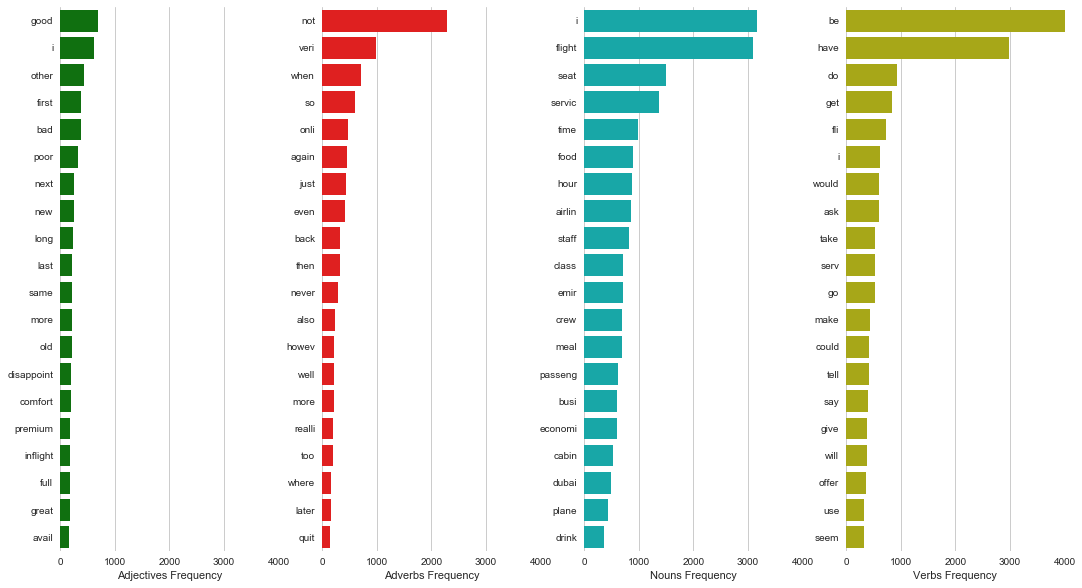

In [582]:
import seaborn as sns
import matplotlib.pyplot as plt

adjectives_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_adjectives)), 'Frequency':list(map(lambda x: x[1], counting_adjectives))})
adverbs_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_adverbs)), 'Frequency':list(map(lambda x: x[1], counting_adverbs))})
nouns_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_nouns)), 'Frequency':list(map(lambda x: x[1], counting_nouns))})
verbs_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_verbs)), 'Frequency':list(map(lambda x: x[1], counting_verbs))})

sns.set(style="whitegrid")

plt.figure(figsize=(18,10))

plt.subplot(141)
ax1 = sns.barplot(x="Frequency", y="Word", data=adjectives_frequency_plot.head(20), label="Frequency", color='g')
ax1.set(xlim=(0, 4000), ylabel="", xlabel="Adjectives Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(142)
ax2 = sns.barplot(x="Frequency", y="Word", data=adverbs_frequency_plot.head(20), label="Frequency", color='r')
ax2.set(xlim=(0, 4000), ylabel="", xlabel="Adverbs Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(143)
ax3 = sns.barplot(x="Frequency", y="Word", data=nouns_frequency_plot.head(20), label="Frequency", color='c')
ax3.set(xlim=(0, 4000), ylabel="", xlabel="Nouns Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(144)
ax4 = sns.barplot(x="Frequency", y="Word", data=verbs_frequency_plot.head(20), label="Frequency", color='y')
ax4.set(xlim=(0, 4000), ylabel="", xlabel="Verbs Frequency")
sns.despine(left=True, bottom=True)

plt.show()

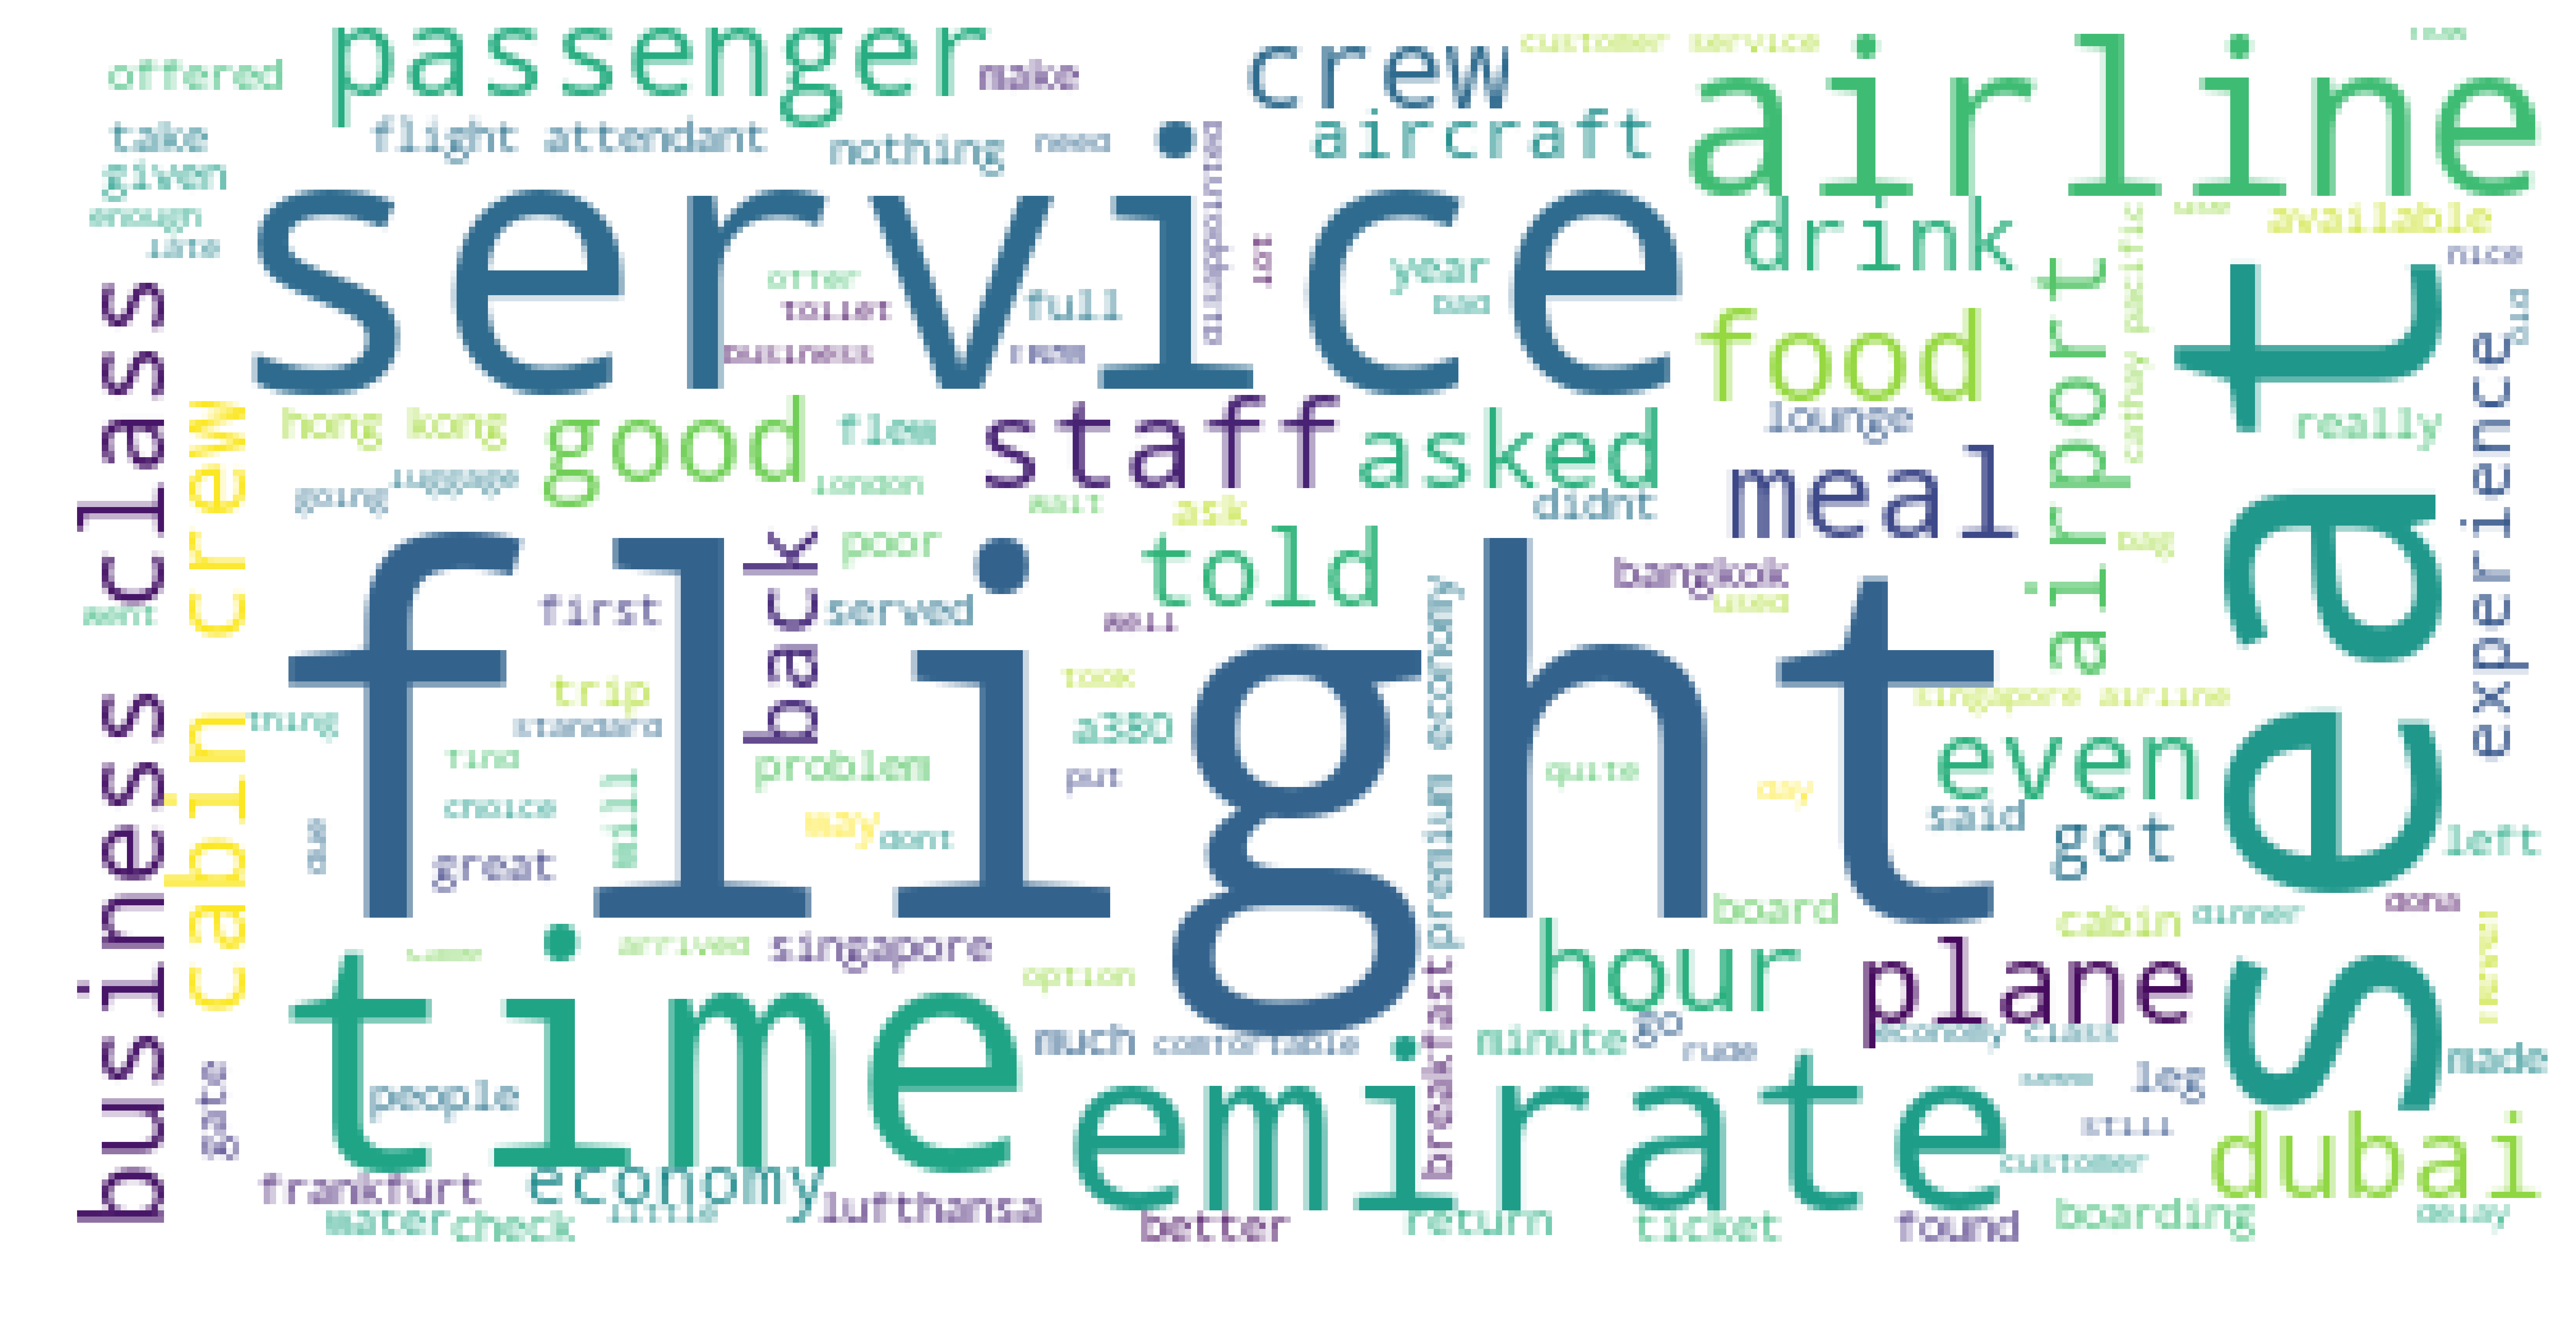

In [583]:
text = ' '.join(list(map(lambda x: x[0], object_words)))

from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=80, relative_scaling=.5).generate(text)
plt.figure(figsize=(20,10), dpi = 400)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [629]:
#finding_word='seat'

word_locations = []
n = 0
for i in object_words:
    if finding_word in i:
        word_locations.append(n)
    n += 1

period_locations = []
n = 0
for i in object_words:
    if '.' in i:
        period_locations.append(n)
    n += 1

In [630]:
finding_neighbors = []
scentences = []
bringing_original_words = list(map(lambda x: x[0], object_words))
for i in word_locations:
    period = period_locations.copy()
    period.append(i)
    period.sort()
    subs_num = period.index(i)
    finding_neighbors.append(object_words[period[subs_num-1]:period[subs_num+1]+1])
    scentences.append(bringing_original_words[period[subs_num-1]:period[subs_num+1]+1])

finding_neighbors

[[('.', '.', '.', '.'),
  ('crew', 'crew', 'crew', 'n'),
  ('were', 'be', 'be', 'v'),
  ('far', 'far', 'far', 'r'),
  ('less', 'less', 'less', 'r'),
  ('attentive', 'attentive', 'attent', 'a'),
  ('first', 'first', 'first', 'a'),
  ('leg', 'leg', 'leg', 'n'),
  ('.', '.', '.', '.')],
 [('.', '.', '.', '.'),
  ('seemed', 'seem', 'seem', 'v'),
  ('be', 'be', 'be', 'v'),
  ('intraining', 'intraining', 'intrain', 'v'),
  ('could', 'could', 'could', 'v'),
  ('not', 'not', 'not', 'r'),
  ('remember', 'remember', 'rememb', 'v'),
  ('bring', 'bring', 'bring', 'v'),
  ('coffee', 'coffee', 'coffe', 'n'),
  ('water', 'water', 'water', 'n'),
  ('even', 'even', 'even', 'r'),
  ('were', 'be', 'be', 'v'),
  ('very', 'very', 'veri', 'r'),
  ('attentive', 'attentive', 'attent', 'a'),
  ('just', 'just', 'just', 'r'),
  ('not', 'not', 'not', 'r'),
  ('very', 'very', 'veri', 'r'),
  ('efficient', 'efficient', 'effici', 'a'),
  ('.', '.', '.', '.')],
 [('.', '.', '.', '.'),
  ('starting', 'starting', 'star

In [631]:
original_scentence_adjectives = list(map(lambda y: y[2], filter(lambda x: x[3] == 'a', sum(finding_neighbors, []))))
unique_scentence_adjectives = set(original_scentence_adjectives)
counting_scentence_adjectives = [(i, original_scentence_adjectives.count(i), 'a') for i in unique_scentence_adjectives]
counting_scentence_adjectives.sort(key=lambda x: x[1], reverse=True)

original_scentence_adverbs = list(map(lambda y: y[2], filter(lambda x: x[3] == 'r', sum(finding_neighbors, []))))
unique_scentence_adverbs = set(original_scentence_adverbs)
counting_scentence_adverbs = [(i, original_scentence_adverbs.count(i), 'r') for i in unique_scentence_adverbs]
counting_scentence_adverbs.sort(key=lambda x: x[1], reverse=True)

original_scentence_nouns = list(map(lambda y: y[2], filter(lambda x: x[3] == 'n', sum(finding_neighbors, []))))
unique_scentence_nouns = set(original_scentence_nouns)
counting_scentence_nouns = [(i, original_scentence_nouns.count(i), 'n') for i in unique_scentence_nouns]
counting_scentence_nouns.sort(key=lambda x: x[1], reverse=True)

original_scentence_verbs = list(map(lambda y: y[2], filter(lambda x: x[3] == 'v', sum(finding_neighbors, []))))
unique_scentence_verbs = set(original_scentence_verbs)
counting_scentence_verbs = [(i, original_scentence_verbs.count(i), 'v') for i in unique_scentence_verbs]
counting_scentence_verbs.sort(key=lambda x: x[1], reverse=True)

# Keywords from the first condition

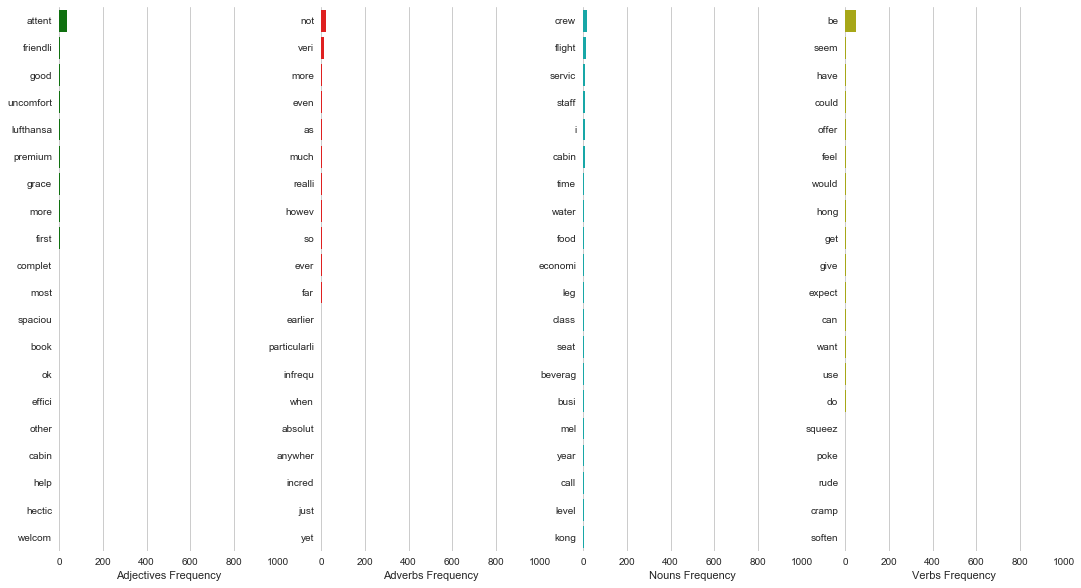

In [632]:
import seaborn as sns
import matplotlib.pyplot as plt

adjectives_scentence_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_adjectives)), 'Frequency':list(map(lambda x: x[1], counting_scentence_adjectives))})
adverbs_scentence_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_adverbs)), 'Frequency':list(map(lambda x: x[1], counting_scentence_adverbs))})
nouns_scentence_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_nouns)), 'Frequency':list(map(lambda x: x[1], counting_scentence_nouns))})
verbs_scentence_frequency_plot = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_verbs)), 'Frequency':list(map(lambda x: x[1], counting_scentence_verbs))})

sns.set(style="whitegrid")

plt.figure(figsize=(18,10))

plt.subplot(141)
ax1 = sns.barplot(x="Frequency", y="Word", data=adjectives_scentence_frequency_plot.head(20), label="Frequency", color='g')
ax1.set(xlim=(0, 1000), ylabel="", xlabel="Adjectives Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(142)
ax2 = sns.barplot(x="Frequency", y="Word", data=adverbs_scentence_frequency_plot.head(20), label="Frequency", color='r')
ax2.set(xlim=(0, 1000), ylabel="", xlabel="Adverbs Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(143)
ax3 = sns.barplot(x="Frequency", y="Word", data=nouns_scentence_frequency_plot.head(20), label="Frequency", color='c')
ax3.set(xlim=(0, 1000), ylabel="", xlabel="Nouns Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(144)
ax4 = sns.barplot(x="Frequency", y="Word", data=verbs_scentence_frequency_plot.head(20), label="Frequency", color='y')
ax4.set(xlim=(0, 1000), ylabel="", xlabel="Verbs Frequency")
sns.despine(left=True, bottom=True)

plt.show()

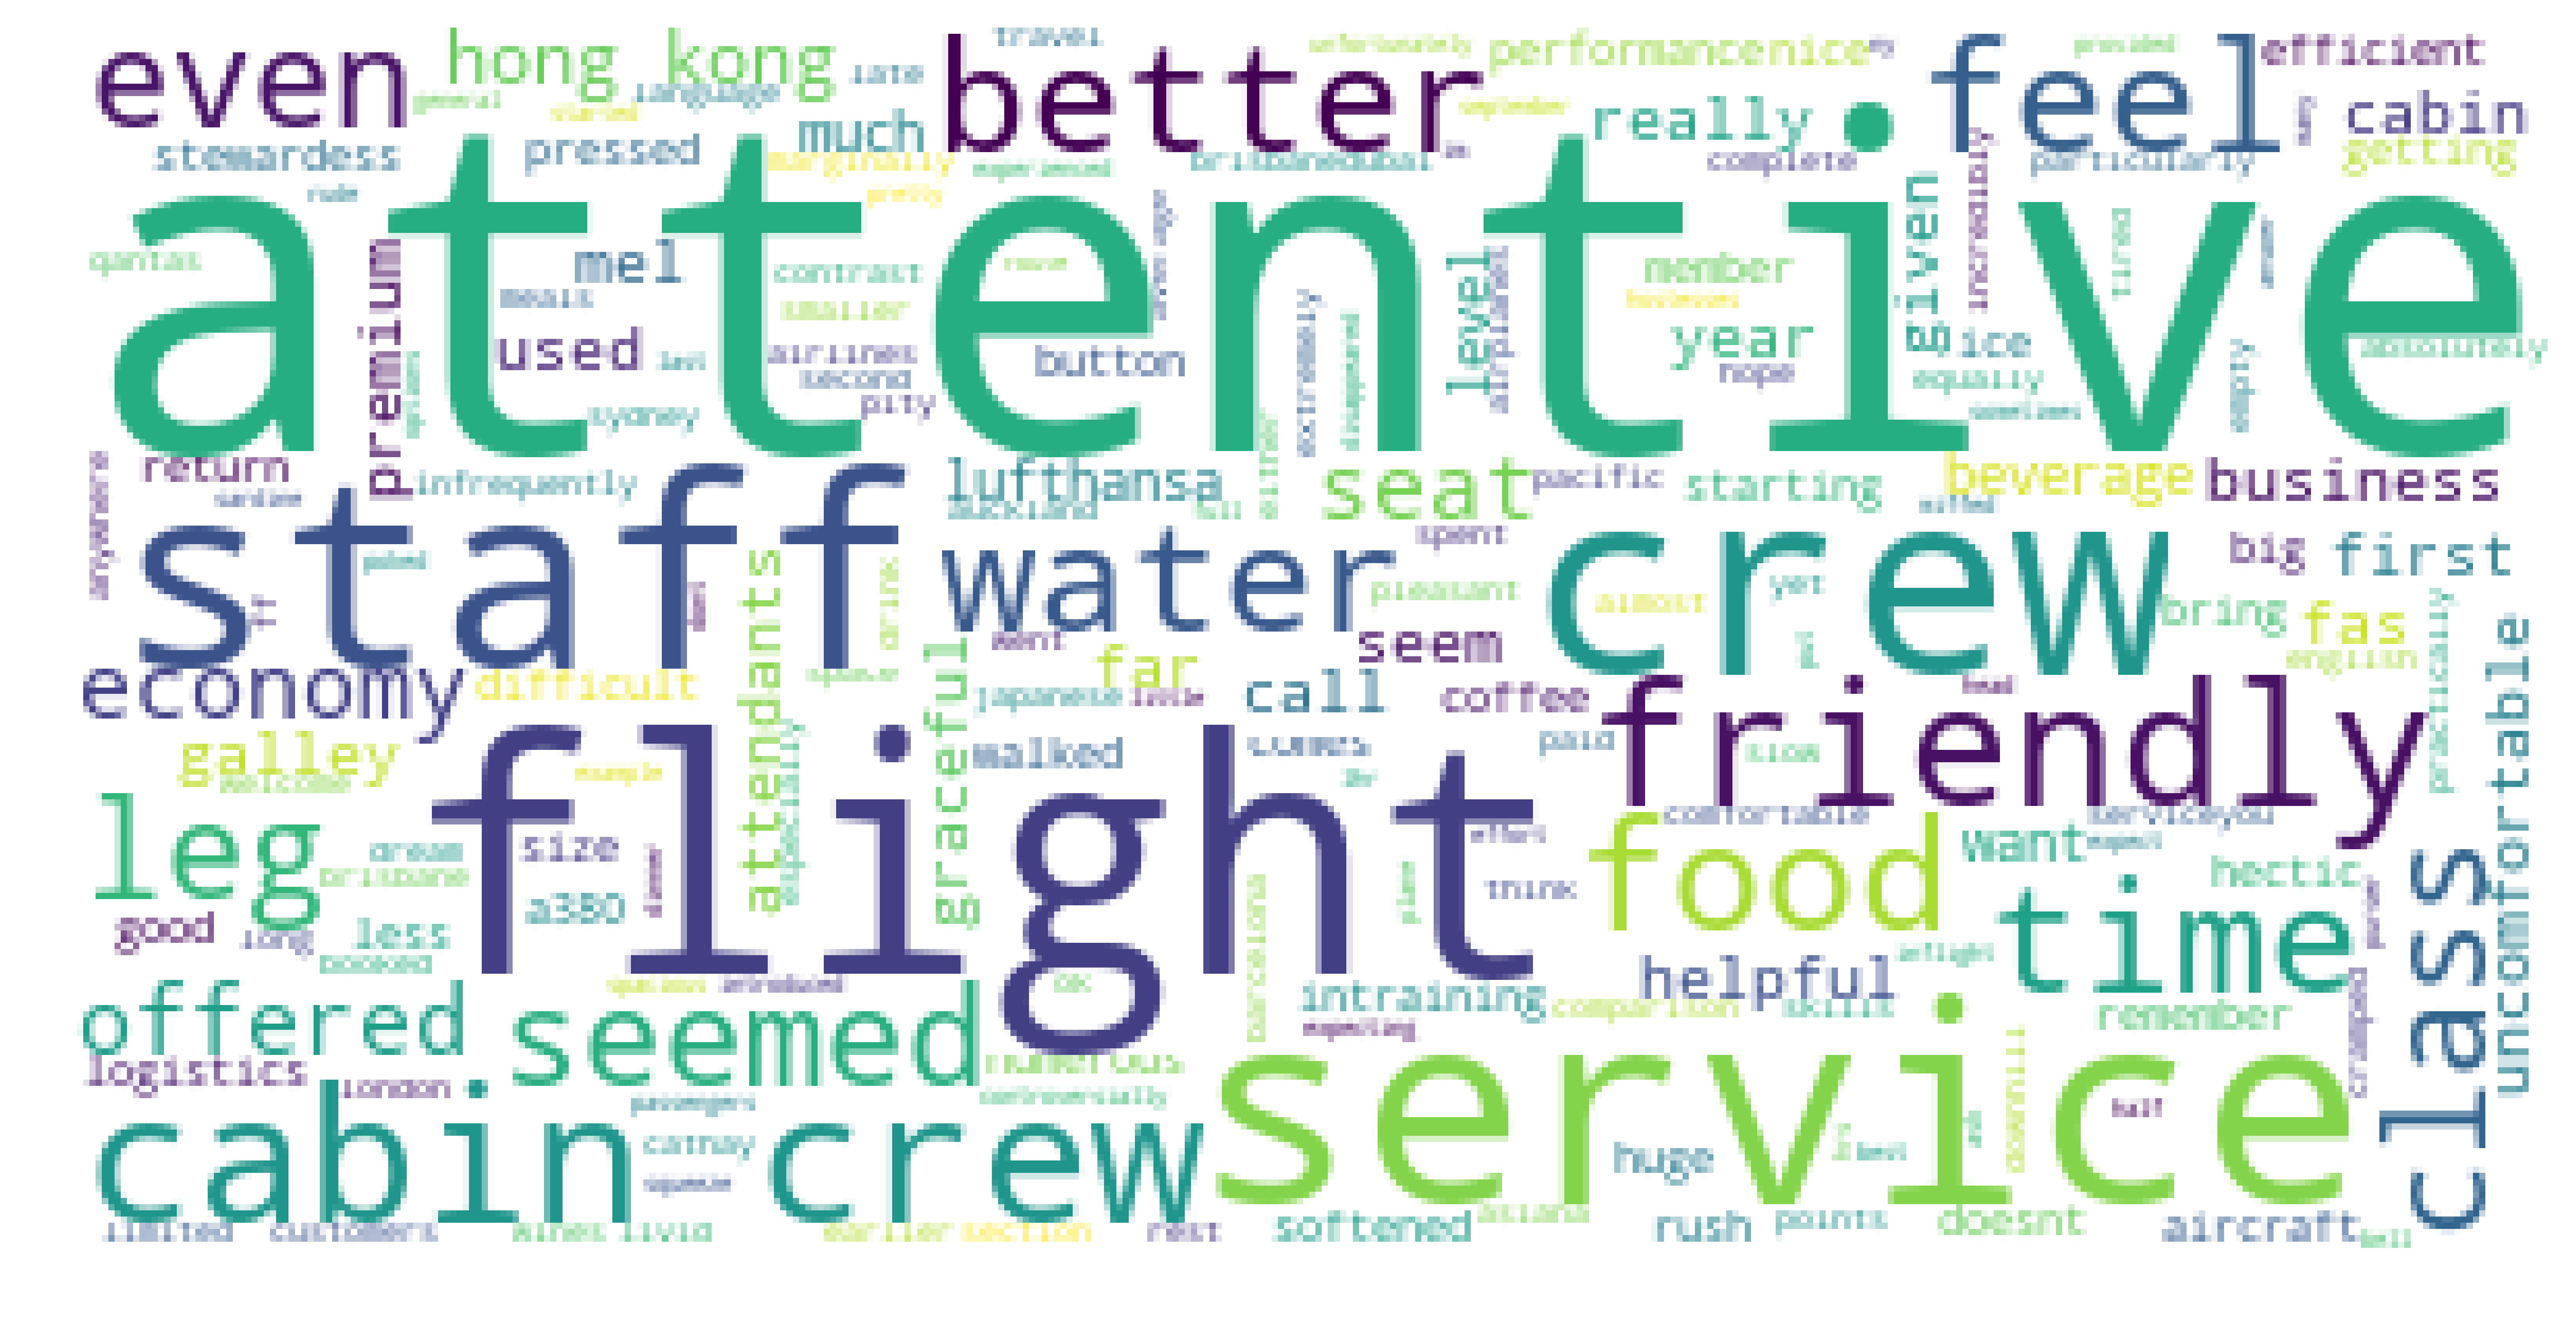

In [633]:
text = ' '.join(list(map(lambda x: x[0], sum(finding_neighbors,[]))))

from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=80, relative_scaling=.5).generate(text)
plt.figure(figsize=(20,10), dpi = 400)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [617]:
#finding_word2='comfort'

flatten_finding_neighbors = sum(finding_neighbors, [])

word_locations2 = []
n = 0
for i in flatten_finding_neighbors:
    if finding_word2 in i:
        word_locations2.append(n)
    n += 1

period_locations2 = []
n = 0
for i in flatten_finding_neighbors:
    if '.' in i:
        period_locations2.append(n)
    n += 1

In [618]:
finding_neighbors2 = []
scentences2 = []
bringing_original_words2 = list(map(lambda x: x[0], flatten_finding_neighbors))
for i in word_locations2:
    period = period_locations2.copy()
    period.append(i)
    period.sort()
    subs_num = period.index(i)
    finding_neighbors2.append(flatten_finding_neighbors[period[subs_num-1]:period[subs_num+1]+1])
    scentences2.append(bringing_original_words2[period[subs_num-1]:period[subs_num+1]+1])

finding_neighbors2

[[('.', '.', '.', '.'),
  ('having', 'have', 'have', 'v'),
  ('flown', 'fly', 'fli', 'v'),
  ('many', 'many', 'mani', 'a'),
  ('times', 'time', 'time', 'n'),
  ('sq', 'sq', 'sq', 'n'),
  ('i', 'i', 'i', 'n'),
  ('did', 'do', 'do', 'v'),
  ('not', 'not', 'not', 'r'),
  ('expect', 'expect', 'expect', 'v'),
  ('almost', 'almost', 'almost', 'r'),
  ('rude', 'rude', 'rude', 'a'),
  ('service', 'service', 'servic', 'n'),
  ('cabin', 'cabin', 'cabin', 'n'),
  ('crew', 'crew', 'crew', 'n'),
  ('attendants', 'attendant', 'attend', 'n'),
  ('.', '.', '.', '.')],
 [('.', '.', '.', '.'),
  ('make', 'make', 'make', 'v'),
  ('matters', 'matter', 'matter', 'n'),
  ('worse', 'bad', 'bad', 'a'),
  ('cabin', 'cabin', 'cabin', 'n'),
  ('crew', 'crew', 'crew', 'n'),
  ('was', 'be', 'be', 'v'),
  ('incredibly', 'incredibly', 'incred', 'r'),
  ('rude', 'rude', 'rude', 'a'),
  ('unpleasant', 'unpleasant', 'unpleas', 'a'),
  ('.', '.', '.', '.')],
 [('.', '.', '.', '.'),
  ('crew', 'crew', 'crew', 'n'),
  ('i

In [619]:
original_scentence_adjectives2 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'a', sum(finding_neighbors2, []))))
unique_scentence_adjectives2 = set(original_scentence_adjectives2)
counting_scentence_adjectives2 = [(i, original_scentence_adjectives2.count(i), 'a') for i in unique_scentence_adjectives2]
counting_scentence_adjectives2.sort(key=lambda x: x[1], reverse=True)

original_scentence_adverbs2 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'r', sum(finding_neighbors2, []))))
unique_scentence_adverbs2 = set(original_scentence_adverbs2)
counting_scentence_adverbs2 = [(i, original_scentence_adverbs2.count(i), 'r') for i in unique_scentence_adverbs2]
counting_scentence_adverbs2.sort(key=lambda x: x[1], reverse=True)

original_scentence_nouns2 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'n', sum(finding_neighbors2, []))))
unique_scentence_nouns2 = set(original_scentence_nouns2)
counting_scentence_nouns2 = [(i, original_scentence_nouns2.count(i), 'n') for i in unique_scentence_nouns2]
counting_scentence_nouns2.sort(key=lambda x: x[1], reverse=True)

original_scentence_verbs2 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'v', sum(finding_neighbors2, []))))
unique_scentence_verbs2 = set(original_scentence_verbs2)
counting_scentence_verbs2 = [(i, original_scentence_verbs2.count(i), 'v') for i in unique_scentence_verbs2]
counting_scentence_verbs2.sort(key=lambda x: x[1], reverse=True)

# Keywords from the second condition

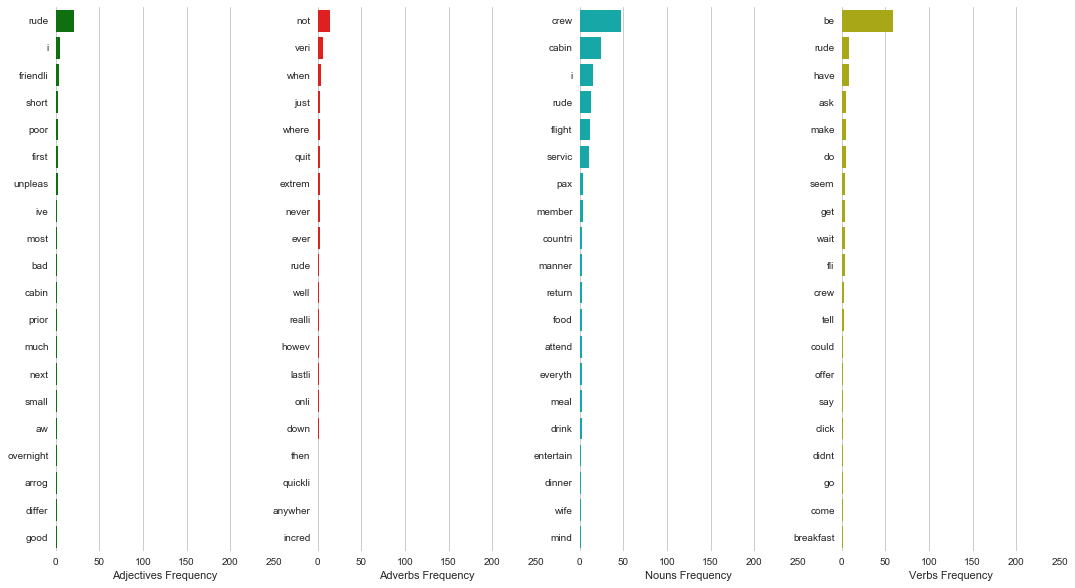

In [620]:
import seaborn as sns
import matplotlib.pyplot as plt

adjectives_scentence_frequency_plot2 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_adjectives2)), 'Frequency':list(map(lambda x: x[1], counting_scentence_adjectives2))})
adverbs_scentence_frequency_plot2 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_adverbs2)), 'Frequency':list(map(lambda x: x[1], counting_scentence_adverbs2))})
nouns_scentence_frequency_plot2 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_nouns2)), 'Frequency':list(map(lambda x: x[1], counting_scentence_nouns2))})
verbs_scentence_frequency_plot2 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_verbs2)), 'Frequency':list(map(lambda x: x[1], counting_scentence_verbs2))})

sns.set(style="whitegrid")

plt.figure(figsize=(18,10))

plt.subplot(141)
ax1 = sns.barplot(x="Frequency", y="Word", data=adjectives_scentence_frequency_plot2.head(20), label="Frequency", color='g')
ax1.set(xlim=(0, 250), ylabel="", xlabel="Adjectives Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(142)
ax2 = sns.barplot(x="Frequency", y="Word", data=adverbs_scentence_frequency_plot2.head(20), label="Frequency", color='r')
ax2.set(xlim=(0, 250), ylabel="", xlabel="Adverbs Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(143)
ax3 = sns.barplot(x="Frequency", y="Word", data=nouns_scentence_frequency_plot2.head(20), label="Frequency", color='c')
ax3.set(xlim=(0, 250), ylabel="", xlabel="Nouns Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(144)
ax4 = sns.barplot(x="Frequency", y="Word", data=verbs_scentence_frequency_plot2.head(20), label="Frequency", color='y')
ax4.set(xlim=(0, 250), ylabel="", xlabel="Verbs Frequency")
sns.despine(left=True, bottom=True)

plt.show()

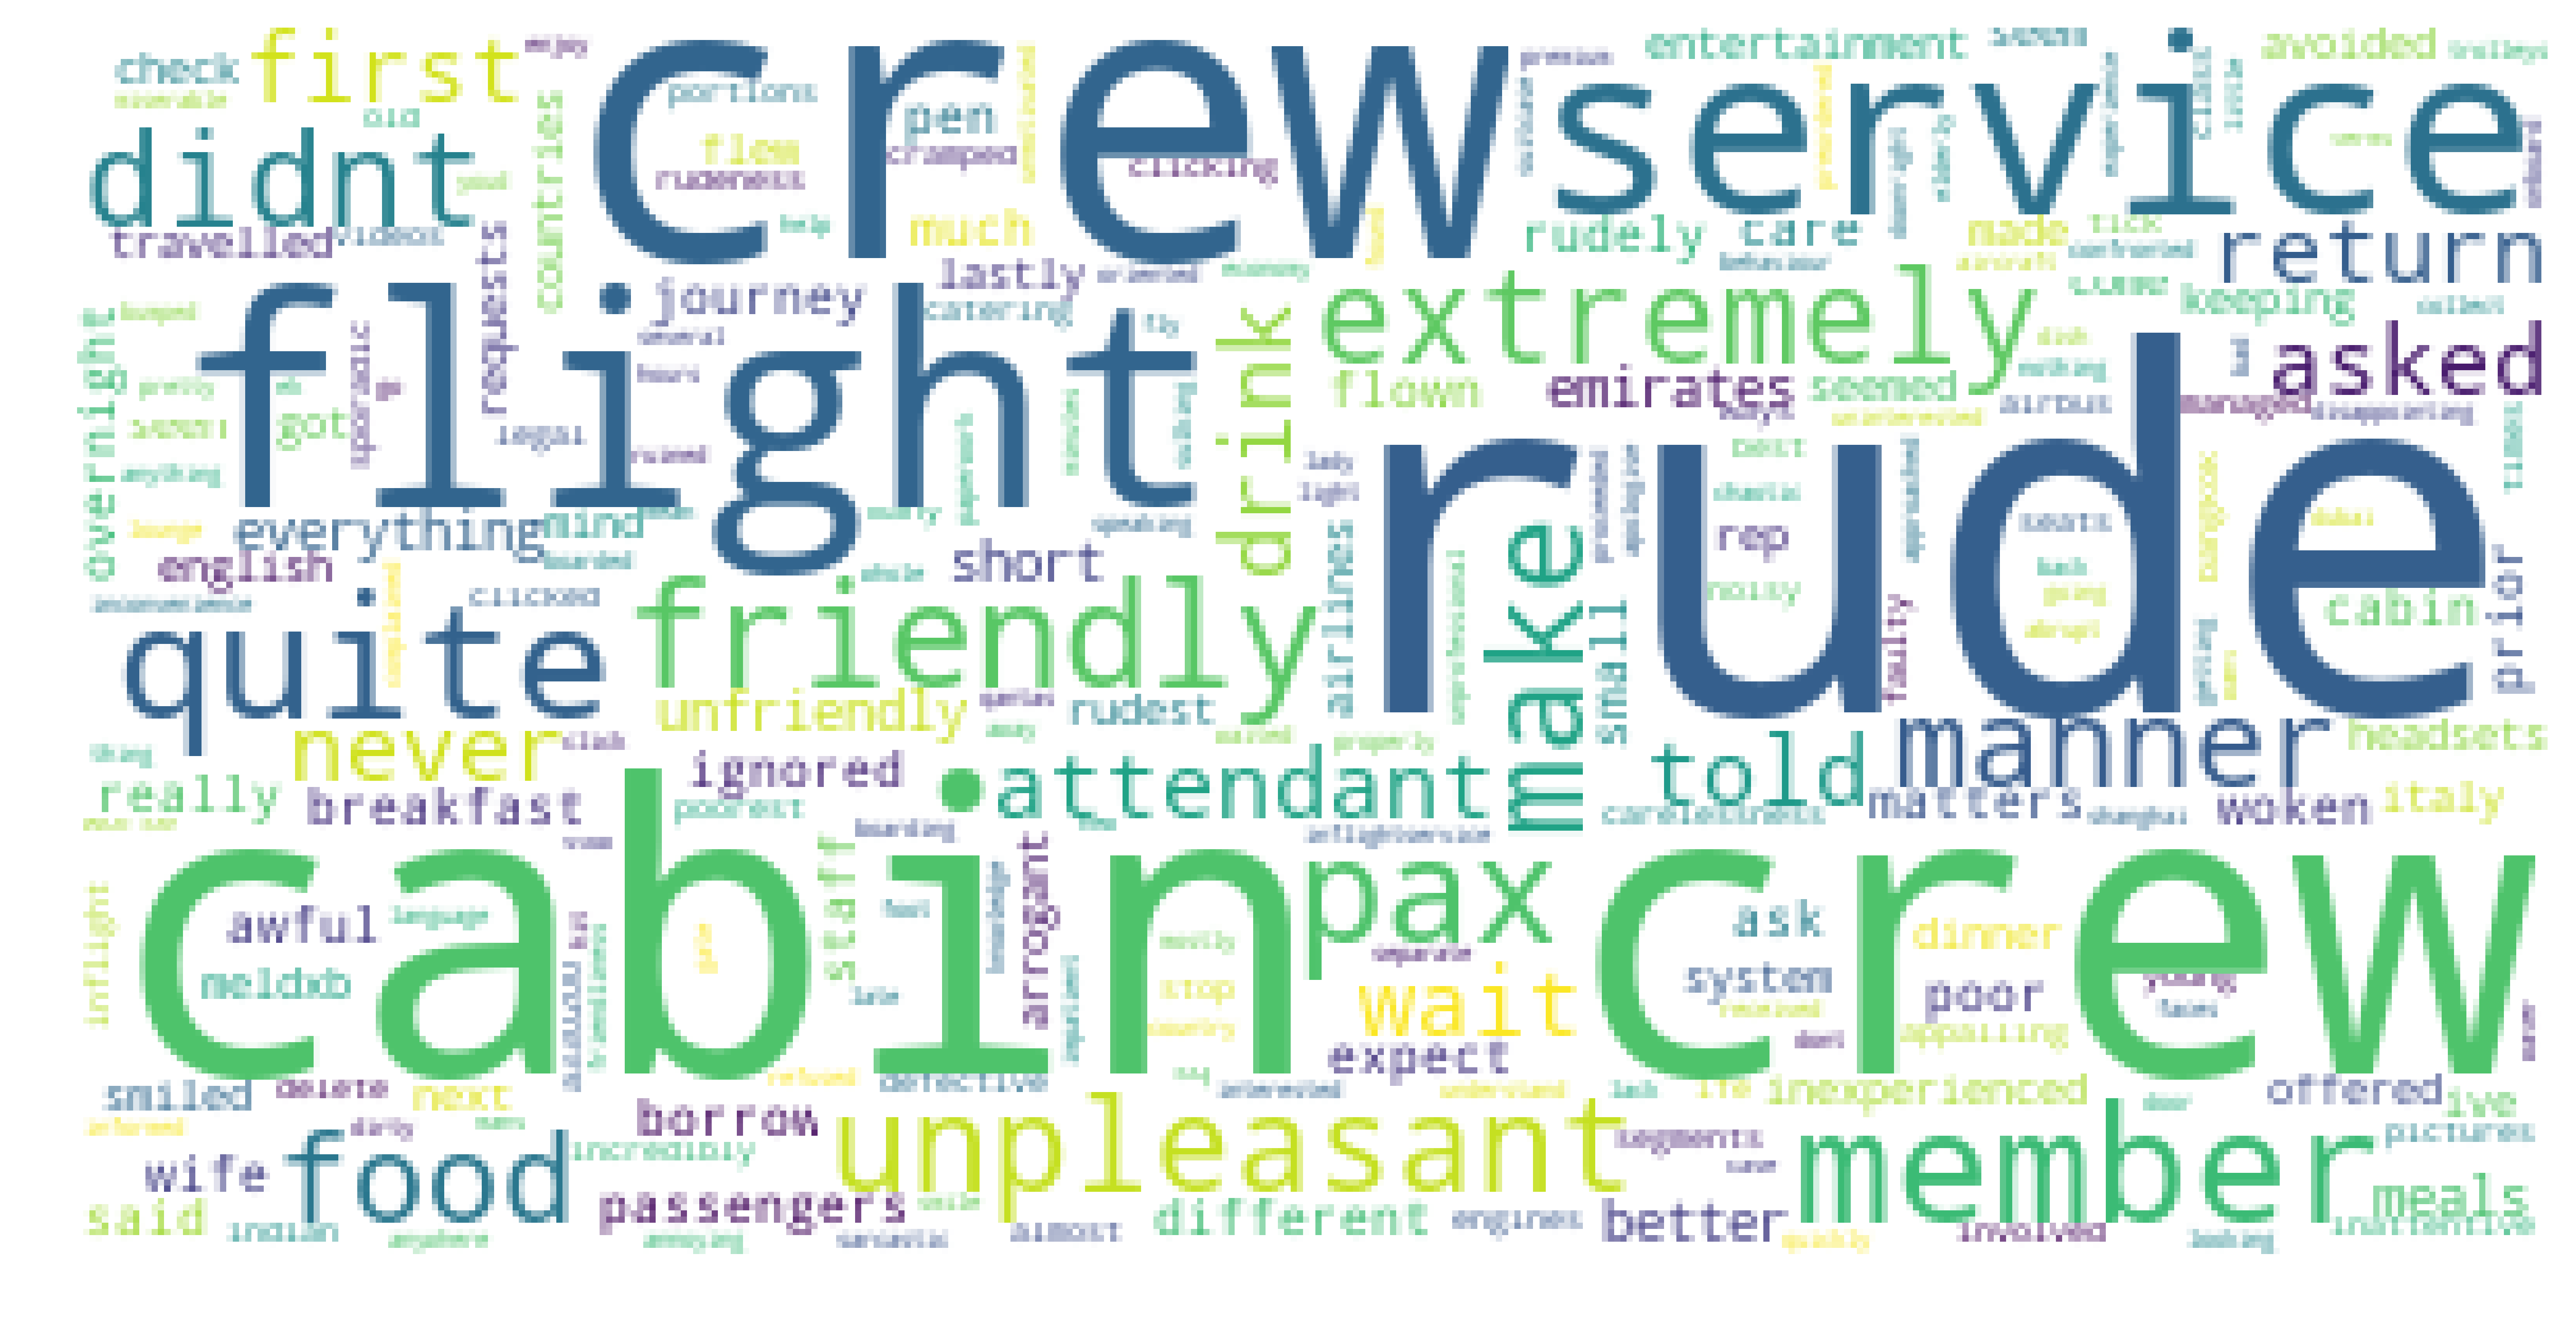

In [621]:
text = ' '.join(list(map(lambda x: x[0], sum(finding_neighbors2,[]))))

from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=80, relative_scaling=.5).generate(text)
plt.figure(figsize=(20,10), dpi = 400)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [384]:
#finding_word3='good'

flatten_finding_neighbors2 = sum(finding_neighbors2, [])

word_locations3 = []
n = 0
for i in flatten_finding_neighbors2:
    if finding_word3 in i:
        word_locations3.append(n)
    n += 1

period_locations3 = []
n = 0
for i in flatten_finding_neighbors2:
    if '.' in i:
        period_locations3.append(n)
    n += 1

In [385]:
finding_neighbors3 = []
scentences3 = []
bringing_original_words3 = list(map(lambda x: x[0], flatten_finding_neighbors2))
for i in word_locations3:
    period = period_locations3.copy()
    period.append(i)
    period.sort()
    subs_num = period.index(i)
    finding_neighbors3.append(flatten_finding_neighbors2[period[subs_num-1]:period[subs_num+1]+1])
    scentences3.append(bringing_original_words3[period[subs_num-1]:period[subs_num+1]+1])

finding_neighbors3

[[('.', '.', '.', '.'),
  ('i', 'i', 'i', 'a'),
  ('dont', 'dont', 'dont', 'v'),
  ('see', 'see', 'see', 'v'),
  ('why', 'why', 'whi', 'r'),
  ('poor', 'poor', 'poor', 'a'),
  ('service', 'service', 'servic', 'n'),
  ('ground', 'ground', 'ground', 'n'),
  ('air', 'air', 'air', 'n'),
  ('old', 'old', 'old', 'a'),
  ('planes', 'plane', 'plane', 'n'),
  ('uncomfortable', 'uncomfortable', 'uncomfort', 'a'),
  ('seats', 'seat', 'seat', 'n'),
  ('terrible', 'terrible', 'terribl', 'a'),
  ('food', 'food', 'food', 'n'),
  ('.', '.', '.', '.')],
 [('.', '.', '.', '.'),
  ('made', 'make', 'make', 'v'),
  ('mental', 'mental', 'mental', 'a'),
  ('note', 'note', 'note', 'n'),
  ('did', 'do', 'do', 'v'),
  ('nothing', 'nothing', 'noth', 'n'),
  ('show', 'show', 'show', 'v'),
  ('reparation', 'reparation', 'repar', 'n'),
  ('poor', 'poor', 'poor', 'a'),
  ('service', 'service', 'servic', 'n'),
  ('admonished', 'admonish', 'admonish', 'v'),
  ('junior', 'junior', 'junior', 'a'),
  ('staff', 'staff', '

In [386]:
original_scentence_adjectives3 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'a', sum(finding_neighbors3, []))))
unique_scentence_adjectives3 = set(original_scentence_adjectives3)
counting_scentence_adjectives3 = [(i, original_scentence_adjectives3.count(i), 'a') for i in unique_scentence_adjectives3]
counting_scentence_adjectives3.sort(key=lambda x: x[1], reverse=True)

original_scentence_adverbs3 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'r', sum(finding_neighbors3, []))))
unique_scentence_adverbs3 = set(original_scentence_adverbs3)
counting_scentence_adverbs3 = [(i, original_scentence_adverbs3.count(i), 'r') for i in unique_scentence_adverbs3]
counting_scentence_adverbs3.sort(key=lambda x: x[1], reverse=True)

original_scentence_nouns3 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'n', sum(finding_neighbors3, []))))
unique_scentence_nouns3 = set(original_scentence_nouns3)
counting_scentence_nouns3 = [(i, original_scentence_nouns3.count(i), 'n') for i in unique_scentence_nouns3]
counting_scentence_nouns3.sort(key=lambda x: x[1], reverse=True)

original_scentence_verbs3 = list(map(lambda y: y[2], filter(lambda x: x[3] == 'v', sum(finding_neighbors3, []))))
unique_scentence_verbs3 = set(original_scentence_verbs3)
counting_scentence_verbs3 = [(i, original_scentence_verbs3.count(i), 'v') for i in unique_scentence_verbs3]
counting_scentence_verbs3.sort(key=lambda x: x[1], reverse=True)

# Keywords from the third condition

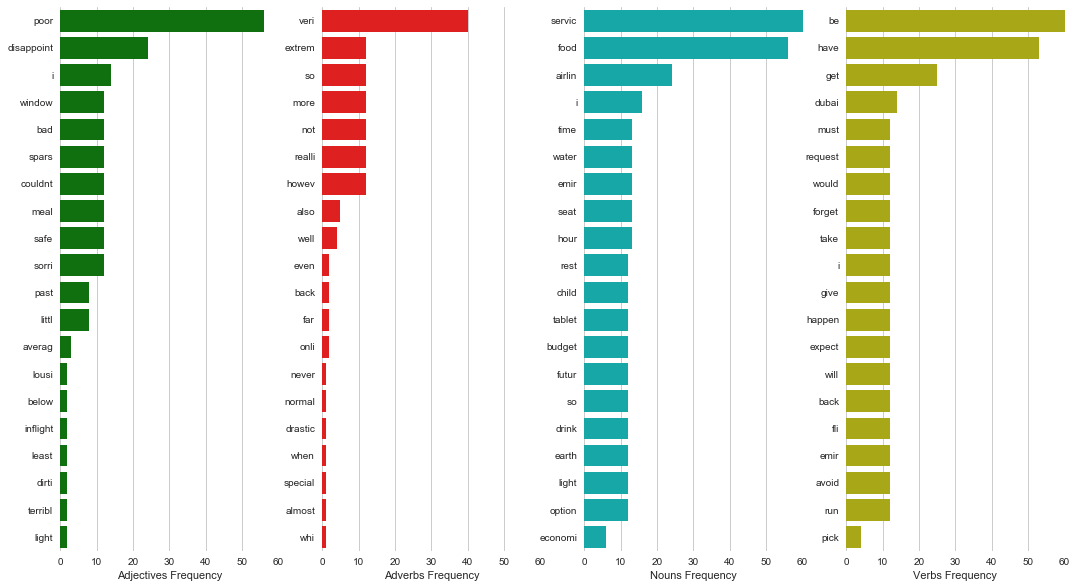

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

adjectives_scentence_frequency_plot3 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_adjectives3)), 'Frequency':list(map(lambda x: x[1], counting_scentence_adjectives3))})
adverbs_scentence_frequency_plot3 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_adverbs3)), 'Frequency':list(map(lambda x: x[1], counting_scentence_adverbs3))})
nouns_scentence_frequency_plot3 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_nouns3)), 'Frequency':list(map(lambda x: x[1], counting_scentence_nouns3))})
verbs_scentence_frequency_plot3 = pd.DataFrame({'Word':list(map(lambda x: x[0], counting_scentence_verbs3)), 'Frequency':list(map(lambda x: x[1], counting_scentence_verbs3))})

sns.set(style="whitegrid")

plt.figure(figsize=(18,10))

plt.subplot(141)
ax1 = sns.barplot(x="Frequency", y="Word", data=adjectives_scentence_frequency_plot3.head(20), label="Frequency", color='g')
ax1.set(xlim=(0, 60), ylabel="", xlabel="Adjectives Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(142)
ax2 = sns.barplot(x="Frequency", y="Word", data=adverbs_scentence_frequency_plot3.head(20), label="Frequency", color='r')
ax2.set(xlim=(0, 60), ylabel="", xlabel="Adverbs Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(143)
ax3 = sns.barplot(x="Frequency", y="Word", data=nouns_scentence_frequency_plot3.head(20), label="Frequency", color='c')
ax3.set(xlim=(0, 60), ylabel="", xlabel="Nouns Frequency")
sns.despine(left=True, bottom=True)

plt.subplot(144)
ax4 = sns.barplot(x="Frequency", y="Word", data=verbs_scentence_frequency_plot3.head(20), label="Frequency", color='y')
ax4.set(xlim=(0, 60), ylabel="", xlabel="Verbs Frequency")
sns.despine(left=True, bottom=True)

plt.show()

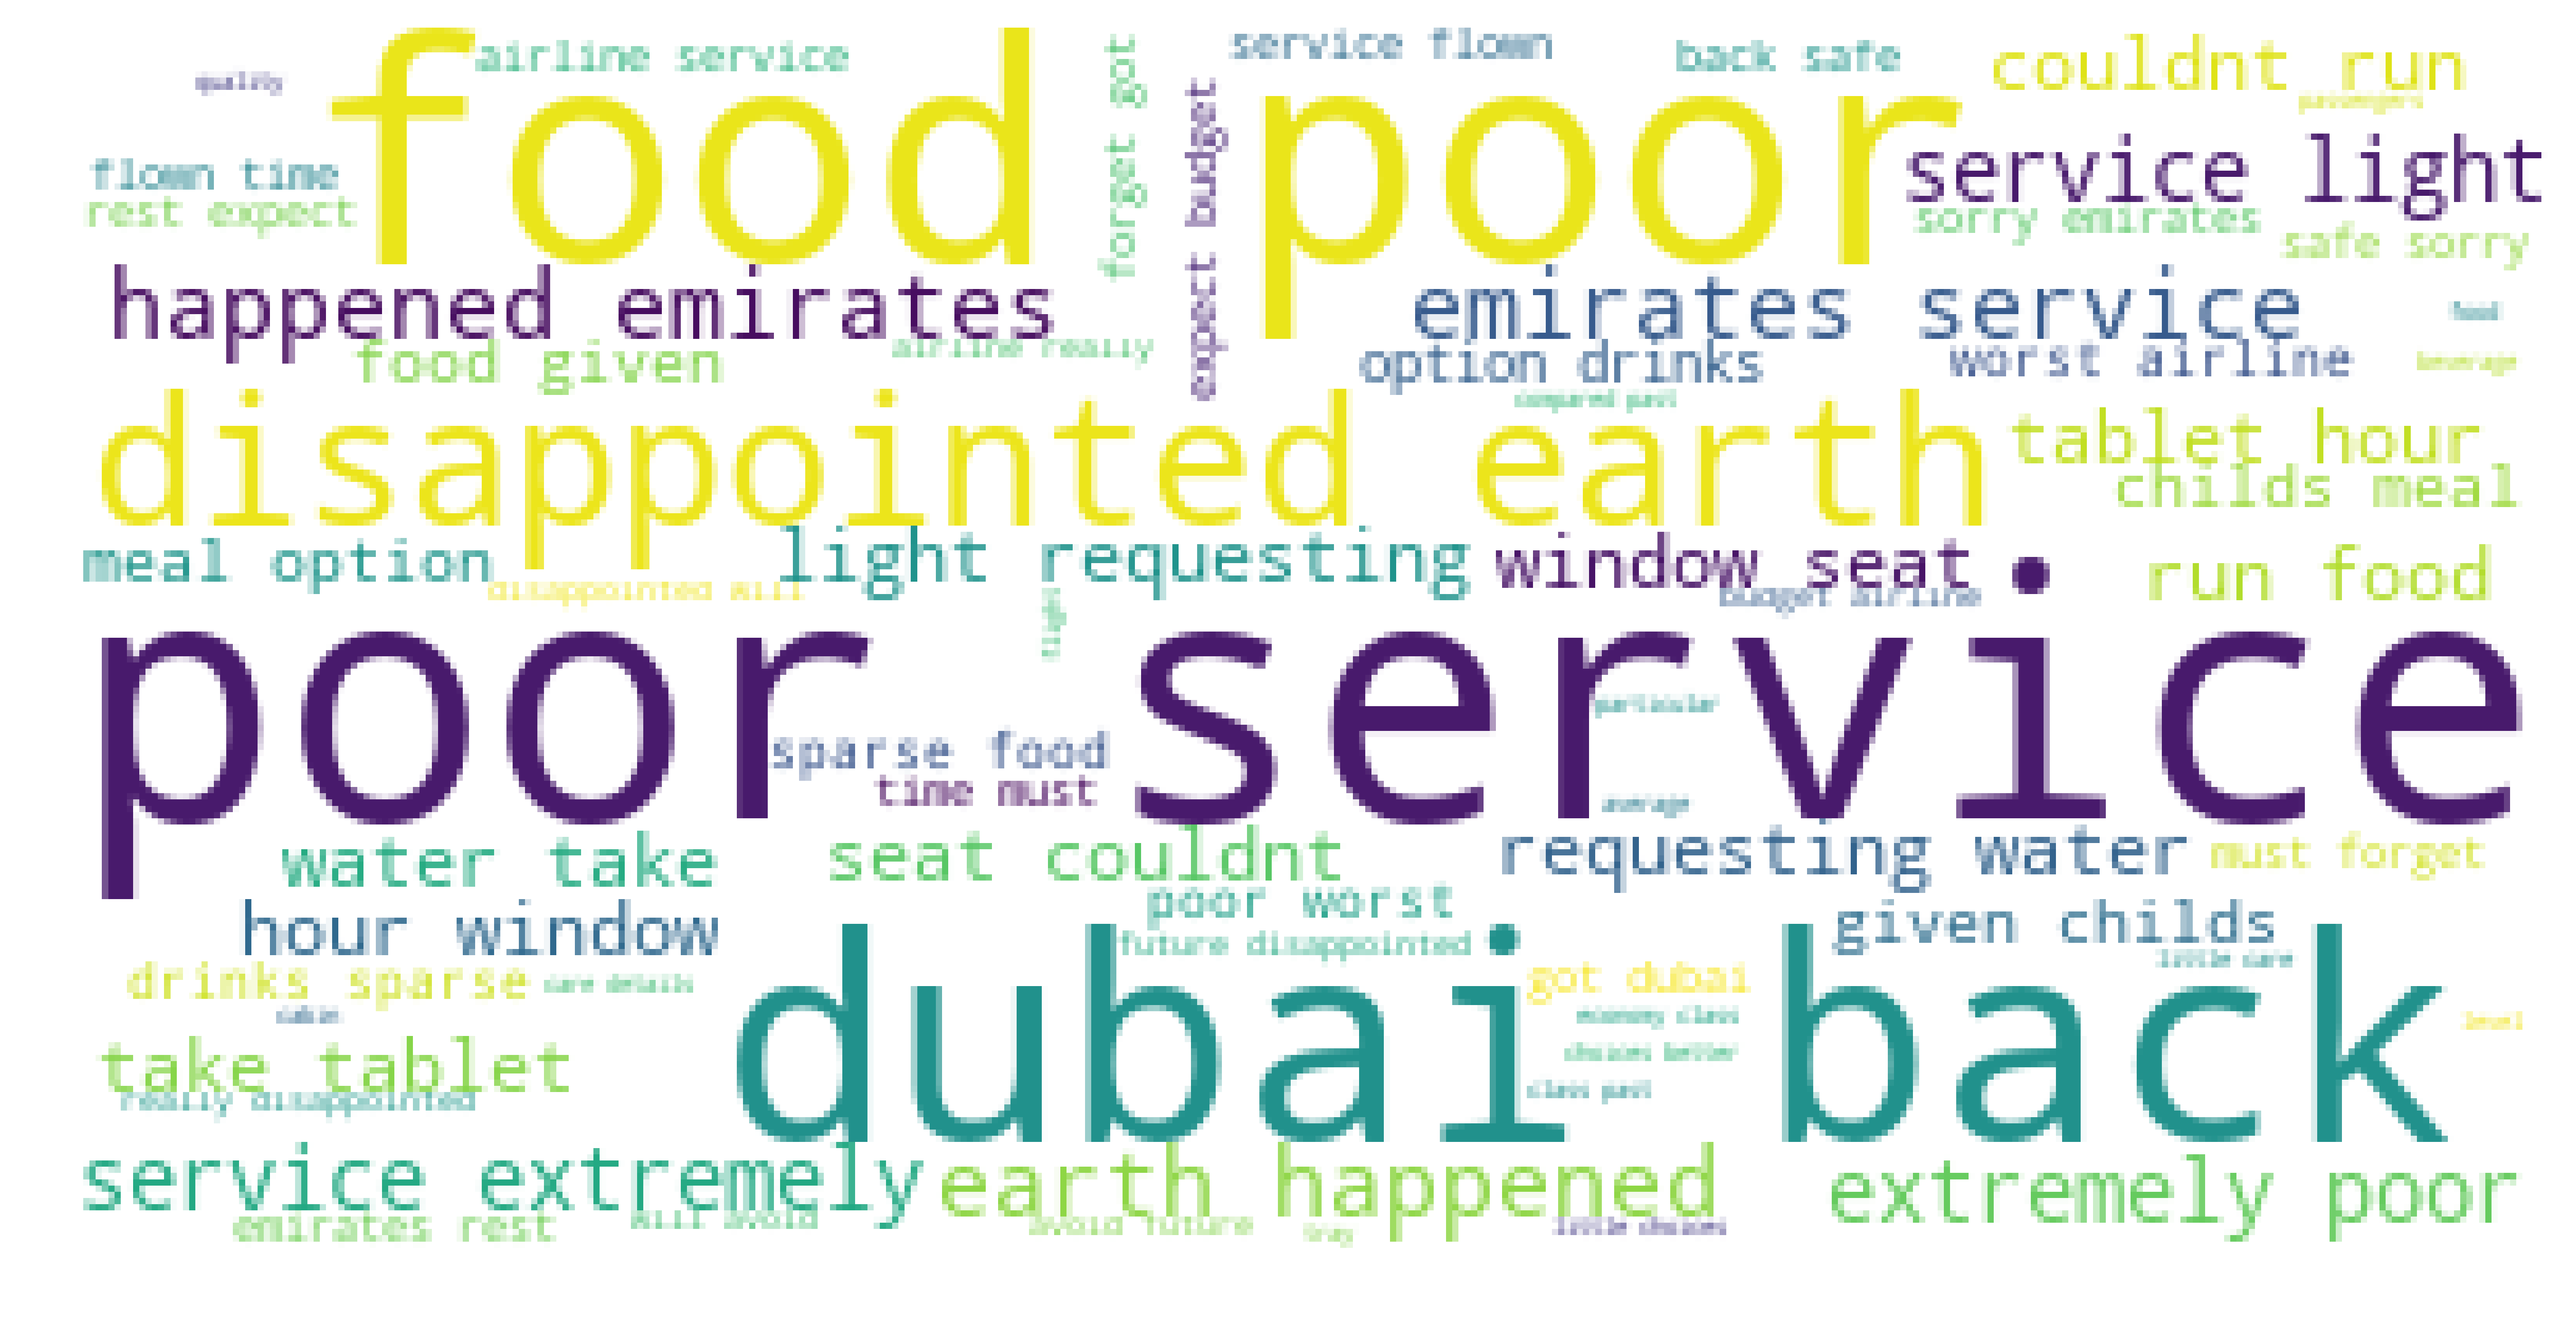

In [388]:
text = ' '.join(list(map(lambda x: x[0], sum(finding_neighbors3, []))))

from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=80, relative_scaling=.5).generate(text)
plt.figure(figsize=(20,10), dpi = 400)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()